# Support Vector Machine

>A **Support Vector Machine (SVM)** is a **discriminative classifier formally defined by a separating hyperplane**. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

What SVM does can be written as: ***Separation of classes***.

## Tunning parameters in SVM

### 1. Kernel:
for ***Linear Kernel*** the equation for prediction for a new input using the dot product between the input ($x$) and each support vector ($x_i$) is calculated as follows:

$$ f(x) = \beta_0 + \sum_i (\alpha_i . <x,x_i> )
$$

The coefficients $\beta_0$ and $\alpha_i$ (for each input) must be estimated from the training data by the learning algorithm.
  
The ***polynomial kernel*** can be written as $$K(x,x_i) = 1 + \sum(x . x_i)^d$$ and ***exponential*** as $$K(x,x_i) = \exp(-\gamma * \sum((x — x_i^2))$$


> Polynomial and exponential kernels calculates separation line in higher dimension. This is called **kernel trick**


### 2. Regularization 
The Regularization parameter (often termed as **C parameter** in python’s sklearn library) tells the SVM optimization **how much you want to avoid misclassifying** each training example.

        The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
       
large values of C, the optimization will choose a smaller-margin hyperplane  
very small value of C will cause the optimizer to look for a larger-margin separating hyperplane

### 3. Gamma

The gamma parameter defines **how far** the influence of a single training example reaches, with *low values meaning ‘far’* and *high values meaning ‘close’*.

<img src="https://i.postimg.cc/RZ0QjpcX/1-Clmsn-U-yb1-Yt-Iw-AAr7krmg.png" width=300 >
<img src="https://i.postimg.cc/8c1rLs4t/1-d-GDQx-V8j83-VB90sk-Hs-Xktw.png" width=300 >


***NOTE:***
Scaling Data is necessary in SVM

## • Support Vector Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.sample(2)

,Med_1_mL,Med_2_mL,Virus Present
80,6.145567,8.913919,0
304,4.087699,3.263051,1


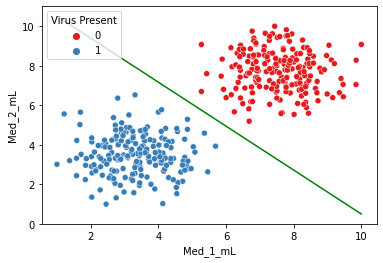

In [5]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='Set1')

plt.plot([1,10],[10.5, 0.5], 'g');

### SVC Model

In [6]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

In [10]:
### MODEL

from sklearn.svm import SVC

In [11]:
svc = SVC(C=100, kernel='linear', gamma='scale')

In [12]:
svc.fit(X_tr_sc, y_train)

SVC(C=100, kernel='linear')

In [13]:
# plot the SVC curve
def plot_svm_boundary(model,X,y):
    
    #X = X.values
    #y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic', alpha=0.7)

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

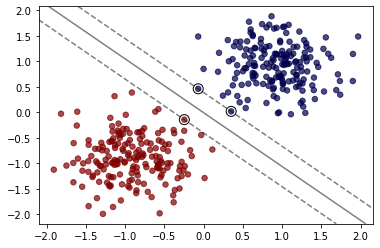

In [14]:
plot_svm_boundary(svc, X_tr_sc, y_train)

***Changing C parameter:***

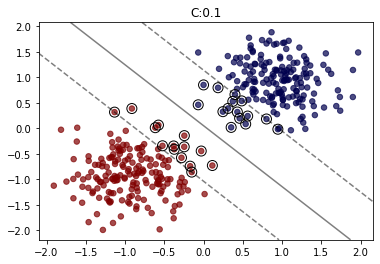

In [15]:
plt.title('C:0.1')
plot_svm_boundary(SVC(C=0.1, kernel='linear').fit(X_tr_sc, y_train), X_tr_sc, y_train)

***Changing Kernel:***

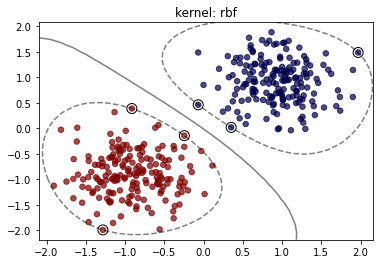

In [16]:
# possible kernels: 
##  'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

plt.title('kernel: rbf')
plot_svm_boundary(SVC(C=100, kernel='rbf').fit(X_tr_sc, y_train), X_tr_sc, y_train)

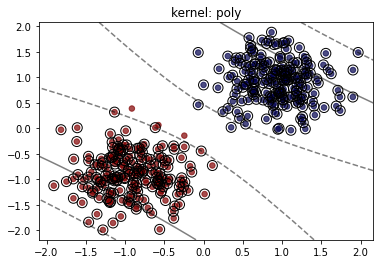

In [17]:
plt.title('kernel: poly')
plot_svm_boundary(SVC(C=10,
                      kernel='poly', 
                      degree=2,
                      gamma='scale').fit(X_tr_sc, y_train),
                  X_tr_sc, y_train)

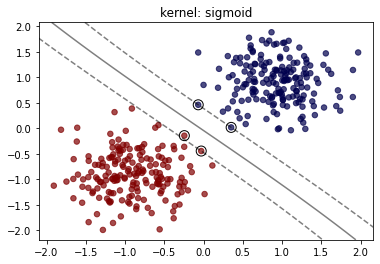

In [18]:
plt.title('kernel: sigmoid')
plot_svm_boundary(SVC(C=10,
                      kernel='sigmoid', 
#                       degree=1,
                      gamma='scale').fit(X_tr_sc, y_train),
                  X_tr_sc, y_train)

***Changing gamma:***

In [19]:
# gamma : {'scale', 'auto'} or float, default='scale'
#     Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

#     - if ``gamma='scale'`` (default) is passed then it uses
#       1 / (n_features * X.var()) as value of gamma,
#     - if 'auto', uses 1 / n_features.

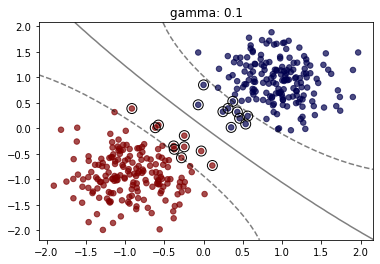

In [20]:
plt.title('gamma: 0.1')
plot_svm_boundary(SVC(C=1,
                      kernel='rbf',
                      gamma=0.1).fit(X_tr_sc, y_train),
                  X_tr_sc, y_train)

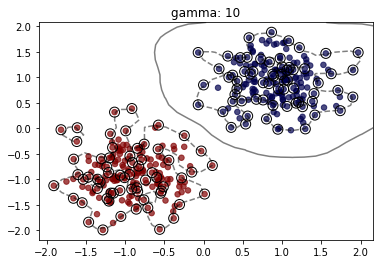

In [21]:
plt.title('gamma: 10')
plot_svm_boundary(SVC(C=1,
                      kernel='rbf',
                      gamma=10).fit(X_tr_sc, y_train),
                  X_tr_sc, y_train)

## GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param = {
    'C':[0.01, 0.1, 0.5, 1, 100],
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'gamma': [0.1, 10, 'scale', 'auto'],
    'degree': [2, 3, 4]
}

In [24]:
svc = SVC()
grid_model = GridSearchCV(svc, param_grid=param, cv=5)

In [25]:
grid_model.fit(X_tr_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 100], 'degree': [2, 3, 4],
                         'gamma': [0.1, 10, 'scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [26]:
grid_model.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [27]:
y_pred = grid_model.predict(X_te_sc)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Because we have well seperated data the accuracy is 100%

## • Support Vector Regression

Support Vector Regression is a supervised learning algorithm that is used to predict **discrete values**.

The basic idea behind SVR is to find the **best fit line**.    

The fit time complexity of SVR is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.  
For large datasets, Linear SVR or SGD Regressor is used. Linear SVR provides a faster implementation than SVR but only considers the linear kernel.
SVR also have some hyperparameters which are the same with SVC but there is another parameter which have not been declared:

#### Boundary Lines:
These are the two lines that are drawn around the hyperplane at a distance of $\epsilon$ **(epsilon)**. It is used to create a margin between the data points.  
The larger ϵ is, the larger errors you admit in your solution. By contrast, if ϵ→0+, every error is penalized: you end with many (tending to the total number of instances) support vectors to sustain that.

There are three different implementations of Support Vector Regression: `SVR`, `NuSVR` and `LinearSVR`. **LinearSVR** provides a *faster implementation* than SVR but only *considers the linear kernel*, while **NuSVR** implements a *slightly different formulation* than **SVR and LinearSVR**.

> LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

### DATA

In [30]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [31]:
df.sample()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
65,159.0,0.0,248.0,175.0,12.0,1041.0,683.0,21.0,51.0,35.39


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


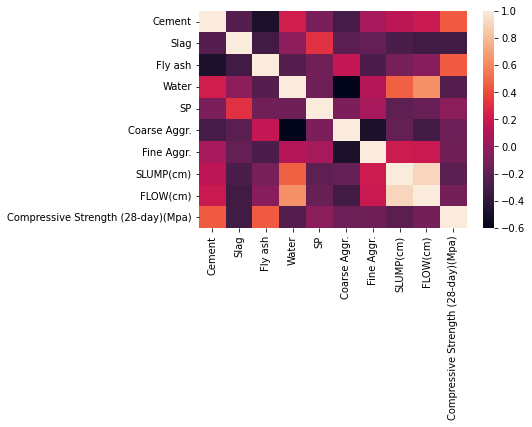

In [33]:
sns.heatmap(df.corr());

### Create Model

In [34]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

In [37]:
#### SVR

from sklearn.svm import SVR, LinearSVR

In [38]:
svr = SVR(kernel='rbf',
          degree=3,
          gamma='scale',
          C=1.0,
          epsilon=0.1)

In [39]:
svr.fit(X_tr_sc, y_train)

SVR()

In [40]:
y_pred = svr.predict(X_te_sc)

In [41]:
#### Model Evaluation 

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('DATA_MEAN:',round(y.mean(), 2))

MAE: 4.606437553692728
RMSE: 6.391449314821403
DATA_MEAN: 36.04


### GridSearchCV 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
svr.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [44]:
params = {
    'C': [0.01, 0.1, 0.5, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto'],
    'epsilon': [0,0.01,0.1,0.5,1,2]
}

In [45]:
grid_model = GridSearchCV(estimator=svr, param_grid=params)

In [46]:
grid_model.fit(X_tr_sc, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10], 'degree': [2, 3],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [47]:
grid_model.best_params_

{'C': 10, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [48]:
grid_pred = grid_model.predict(X_te_sc)

In [49]:
print('MAE:', mean_absolute_error(y_test, grid_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, grid_pred)))
print('DATA_MEAN:',round(y.mean(), 2))

MAE: 1.1232468601191556
RMSE: 1.3833173763948508
DATA_MEAN: 36.04


### Conclusion

**Advantages of Support Vector Regression**

Although Support Vector Regression is used rarely it carries certain advantages that are as mentioned below:

1. It is robust to outliers.
2. Decision model can be easily updated.
3. It has excellent generalization capability, with high prediction accuracy.
4. Its implementation is easy.

**Disadvantages of Support Vector Regression**

Some of the drawbacks faced by Support Vector Machines while handling regression problems are as mentioned below:

1. They are not suitable for large datasets.
2. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
3. The Decision model does not perform very well when the data set has more noise i.e. target classes are overlapping..